<a href="https://colab.research.google.com/github/dtabuena/Workshop/blob/main/Image/Test_Stitch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install opencv-python

In [3]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [4]:
image_set_dir = "C:\\Users\\dennis.tabuena\\Dropbox (Gladstone)\\0_Projects\\_Hyper+Crisper\\Morphological_Analysis\\TestNeuron1\\"
image_set_prefix = 'Test_Neuron1'

os.chdir(image_set_dir)

tif_list=list()
for dir,root,files in os.walk(image_set_dir):
    for f in files:
        if 'CH4.tif' in f:
            tif_list.append(os.path.join(dir,f))


In [5]:
pd_dict = {'file_loc': [t for t in tif_list],
           'xy': [t.split("_")[-3] for t in tif_list],
           'z': [t.split("_")[-2] for t in tif_list]}
image_df = pd.DataFrame(pd_dict)

display(image_df)


,file_loc,xy,z
0,C:\Users\dennis.tabuena\Dropbox (Gladstone)\0_...,00001,Z001
1,C:\Users\dennis.tabuena\Dropbox (Gladstone)\0_...,00001,Z002
2,C:\Users\dennis.tabuena\Dropbox (Gladstone)\0_...,00001,Z003
3,C:\Users\dennis.tabuena\Dropbox (Gladstone)\0_...,00001,Z004
4,C:\Users\dennis.tabuena\Dropbox (Gladstone)\0_...,00001,Z005
...,...,...,...
2845,C:\Users\dennis.tabuena\Dropbox (Gladstone)\0_...,00025,Z110
2846,C:\Users\dennis.tabuena\Dropbox (Gladstone)\0_...,00025,Z111
2847,C:\Users\dennis.tabuena\Dropbox (Gladstone)\0_...,00025,Z112
2848,C:\Users\dennis.tabuena\Dropbox (Gladstone)\0_...,00025,Z113


['Z001', 'Z002', 'Z003', 'Z004', 'Z005', 'Z006', 'Z007', 'Z008', 'Z009', 'Z010', 'Z011', 'Z012', 'Z013', 'Z014', 'Z015', 'Z016', 'Z017', 'Z018', 'Z019', 'Z020', 'Z021', 'Z022', 'Z023', 'Z024', 'Z025', 'Z026', 'Z027', 'Z028', 'Z029', 'Z030', 'Z031', 'Z032', 'Z033', 'Z034', 'Z035', 'Z036', 'Z037', 'Z038', 'Z039', 'Z040', 'Z041', 'Z042', 'Z043', 'Z044', 'Z045', 'Z046', 'Z047', 'Z048', 'Z049', 'Z050', 'Z051', 'Z052', 'Z053', 'Z054', 'Z055', 'Z056', 'Z057', 'Z058', 'Z059', 'Z060', 'Z061', 'Z062', 'Z063', 'Z064', 'Z065', 'Z066', 'Z067', 'Z068', 'Z069', 'Z070', 'Z071', 'Z072', 'Z073', 'Z074', 'Z075', 'Z076', 'Z077', 'Z078', 'Z079', 'Z080', 'Z081', 'Z082', 'Z083', 'Z084', 'Z085', 'Z086', 'Z087', 'Z088', 'Z089', 'Z090', 'Z091', 'Z092', 'Z093', 'Z094', 'Z095', 'Z096', 'Z097', 'Z098', 'Z099', 'Z100', 'Z101', 'Z102', 'Z103', 'Z104', 'Z105', 'Z106', 'Z107', 'Z108', 'Z109', 'Z110', 'Z111', 'Z112', 'Z113', 'Z114']


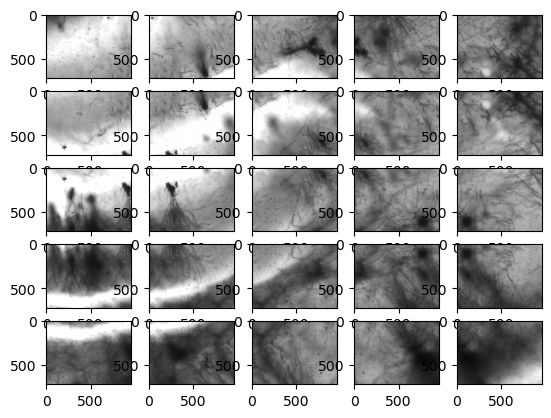

In [6]:
z_planes = sorted(list(set(image_df['z'])))
print(z_planes)

for cur_z in [z_planes[15]]:
    single_plane_images = image_df['file_loc'][[cur_z in z for z in image_df['z']]].values
image_data_list = list()
for path in single_plane_images:
    image_data =cv2.imread(path)
    image_data_list.append(image_data)
order = np.array(list(range(0,5,1)) + list(range(9,4,-1)) + list(range(10,15,1)) + list(range(19,14,-1)) + list(range(20,25,1)))
image_data_list_sorted = [image_data_list[o] for o in order]

fig,ax=plt.subplots(5,5)
ax = ax.flatten()
for i,f in enumerate(image_data_list_sorted):
    ax[i].imshow(f)

In [7]:
!pip install stitching
from stitching import Stitcher


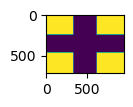

In [10]:
def plus_mask(img,n=.35):
    mask = np.ones_like(img[:,:,0])
    m_shape = np.shape(mask)
    mask[int(m_shape[0]*n):int(m_shape[0]*(1-n)),:] = 0
    mask[:,int(m_shape[1]*n):int(m_shape[1]*(1-n))] = 0
    # mask[int(m_shape[0]*n):int(m_shape[0]*(1-n)),int(m_shape[1]*n):int(m_shape[1]*(1-n))] = 0
    return mask

fig,ax=plt.subplots(1,figsize=(1,1))
plt.imshow(plus_mask(image_data_list[0],n=.35))

In [11]:
subset = image_data_list

graph matches_graph{
"0" -- "1"[label="Nm=15, Ni=14, C=1.12"];
"0" -- "9"[label="Nm=22, Ni=20, C=1.36986"];
"1" -- "2"[label="Nm=41, Ni=39, C=1.92118"];
"1" -- "7"[label="Nm=24, Ni=20, C=1.31579"];
"1" -- "8"[label="Nm=42, Ni=37, C=1.79612"];
"2" -- "3"[label="Nm=14, Ni=13, C=1.06557"];
"3" -- "4"[label="Nm=52, Ni=51, C=2.16102"];
"3" -- "6"[label="Nm=22, Ni=18, C=1.23288"];
"4" -- "5"[label="Nm=23, Ni=20, C=1.34228"];
"5" -- "14"[label="Nm=72, Ni=70, C=2.36486"];
"6" -- "13"[label="Nm=15, Ni=15, C=1.2"];
"9" -- "10"[label="Nm=16, Ni=13, C=1.01563"];
"11" -- "12"[label="Nm=17, Ni=16, C=1.22137"];
"11" -- "18"[label="Nm=15, Ni=13, C=1.04"];
"14" -- "15"[label="Nm=28, Ni=27, C=1.64634"];
"16" -- "17"[label="Nm=26, Ni=25, C=1.58228"];
"16" -- "22"[label="Nm=12, Ni=12, C=1.03448"];
"16" -- "23"[label="Nm=26, Ni=24, C=1.51899"];
"17" -- "18"[label="Nm=27, Ni=25, C=1.5528"];
"18" -- "19"[label="Nm=20, Ni=16, C=1.14286"];
"19" -- "20"[label="Nm=24, Ni=23, C=1.51316"];
"19" -- "21"[label="Nm=1

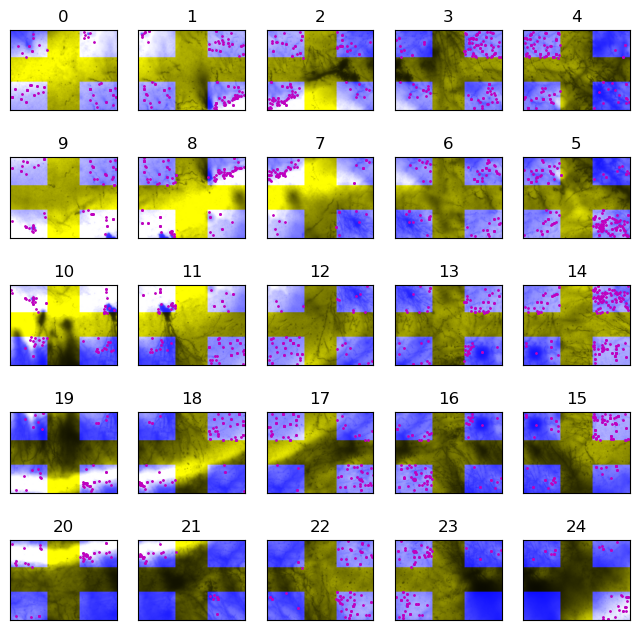

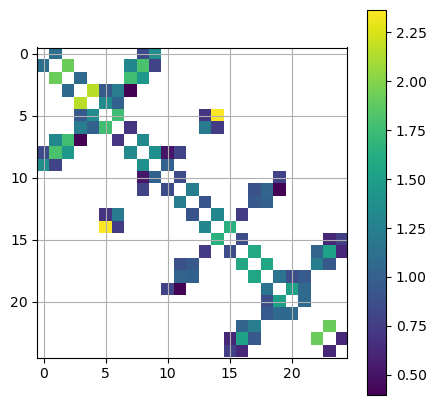

In [25]:
from stitching.images import Images
img = Images.of(subset, medium_megapix=0.96, low_megapix=0.1, final_megapix=-1)
medium_imgs = list(img.resize(Images.Resolution.MEDIUM))
subset = medium_imgs

from stitching.feature_detector import FeatureDetector
finder = FeatureDetector(detector='sift', nfeatures=500)

features = [finder.detect_features(img, plus_mask(img,n=.35) ) for img in subset]

from stitching.feature_matcher import FeatureMatcher
matcher = FeatureMatcher()
matches = matcher.match_features(features)
matcher.get_confidence_matrix(matches)
conf_mat = matcher.get_confidence_matrix(matches)

fig,ax=plt.subplots(5,5,figsize=(8,8))
ax = ax.flatten()
for i,(img,feat) in enumerate(zip(subset,features)):
    img_h = img.copy()
    img_h[:,:,2] = plus_mask(img,n=.35)*255
    ax[order[i]].imshow(img_h)
    ax[order[i]].set_xticks([])
    ax[order[i]].set_yticks([])
    for k in feat.keypoints:
        ax[order[i]].scatter(k.pt[0],k.pt[1],s=1,color='m')
        ax[order[i]].set_title(i)


conf_mat = matcher.get_confidence_matrix(matches)
conf_mat[conf_mat==0]=np.nan
fig,ax=plt.subplots(1,figsize=(5,5))
cb=ax.imshow(conf_mat)
plt.colorbar(cb)
ax.grid('on')
np.nanmin(conf_mat,1)

from stitching.subsetter import Subsetter
subsetter = Subsetter()
dot_notation = subsetter.get_matches_graph([str(i) for i in range(25)], matches)
print(dot_notation)



In [30]:
from stitching.camera_estimator import CameraEstimator
from stitching.camera_adjuster import CameraAdjuster
from stitching.camera_wave_corrector import WaveCorrector


camera_estimator = CameraEstimator()
camera_adjuster = CameraAdjuster()
wave_corrector = WaveCorrector()

cameras = camera_estimator.estimate(features, matches)
cameras = camera_adjuster.adjust(features, matches, cameras)
cameras = wave_corrector.correct(cameras)

In [456]:
stitcher2 = Stitcher(detector='sift', nfeatures=850,confidence_threshold=.01,medium_megapix=0.96)
subset = image_data_list
masks = [plus_mask(img) for img in subset]
merged = stitcher2.stitch(subset,masks)
plt.imshow(merged)

StitchingError: Camera parameters adjusting failed.